<a href="https://colab.research.google.com/github/Mario5T/Sleep_Deeprived/blob/main/Sleep_Deprived.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proof of Zipf's Law on  Dua Lipa songs Dataset

Aditya Singh  (aditya.singh01@adypu.edu.in)

Shreyas Sarkar (shreyas.sarkar@adypu.edu.in)

Pratik Kumar Pan (pratik.pan@adypu.edu.in)

Priyank Gaur (priyank.gaur@adypu.edu.in)

In [ ]:
l!pip install seaborn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from scipy.stats import linregress

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/DuaLipa.csv'
import pandas as pd
df = pd.read_csv(file_path)
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...,...
242,242,Dua Lipa,Hotter Than Hell (Carsten Fietz Remix),Hotter Than Hell (Remixes),NaN,NaN,ah yeah ah yeah he calls me the devil i make...
243,243,Dua Lipa,Future Nostalgia (Jon Goddard Remix),NaN,NaN,NaN,lyrics for this song have yet to be released p...
244,244,Dua Lipa,Dua Lipa - Blow Your Mind (Mwah) (Traducción a...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-08-26,verso se que hace calor sé que tenemos algo q...
245,245,Dua Lipa,Dua Lipa - Hotter Than Hell (Traducción al Esp...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-05-06,ah yeah ah yeah verso el me llama el diablo ...


In [ ]:
print("📌 First few rows of data:")
display(df.head())

📌 First few rows of data:


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...


In [ ]:
print("\n📌 Dataset Info:")
df.info()


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  247 non-null    int64  
 1   Artist      247 non-null    object 
 2   Title       247 non-null    object 
 3   Album       160 non-null    object 
 4   Year        178 non-null    float64
 5   Date        178 non-null    object 
 6   Lyric       246 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.6+ KB


In [ ]:
print("\n📌 Summary Statistics:")
display(df.describe(include='all'))


📌 Summary Statistics:


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
count,247.00000,247,247,160,178.000000,178,246
unique,NaN,1,247,26,NaN,91,213
top,NaN,Dua Lipa,New Rules,Unreleased Songs,NaN,2020-09-11,lyrics for this song have yet to be released p...
freq,NaN,247,1,50,NaN,15,21
mean,123.00000,NaN,NaN,NaN,2018.230337,NaN,NaN
std,71.44695,NaN,NaN,NaN,1.930364,NaN,NaN
min,0.00000,NaN,NaN,NaN,2012.000000,NaN,NaN
25%,61.50000,NaN,NaN,NaN,2017.000000,NaN,NaN
50%,123.00000,NaN,NaN,NaN,2019.000000,NaN,NaN
75%,184.50000,NaN,NaN,NaN,2020.000000,NaN,NaN


In [ ]:
print("\n📌 Null values in each column:")
display(df.isnull().sum())


📌 Null values in each column:


,0
Unnamed: 0,0
Artist,0
Title,0
Album,87
Year,69
Date,69
Lyric,1


In [ ]:
print("\n📌 Number of duplicate rows:")
print(df.duplicated().sum())


📌 Number of duplicate rows:
0


In [ ]:
df = df.dropna(subset=['Lyric']).copy()
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...,...
242,242,Dua Lipa,Hotter Than Hell (Carsten Fietz Remix),Hotter Than Hell (Remixes),NaN,NaN,ah yeah ah yeah he calls me the devil i make...
243,243,Dua Lipa,Future Nostalgia (Jon Goddard Remix),NaN,NaN,NaN,lyrics for this song have yet to be released p...
244,244,Dua Lipa,Dua Lipa - Blow Your Mind (Mwah) (Traducción a...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-08-26,verso se que hace calor sé que tenemos algo q...
245,245,Dua Lipa,Dua Lipa - Hotter Than Hell (Traducción al Esp...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-05-06,ah yeah ah yeah verso el me llama el diablo ...


In [ ]:
df['Album'] = df['Album'].fillna("Unknown Album")
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Date'] = df['Date'].fillna("Unknown")
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...,...
242,242,Dua Lipa,Hotter Than Hell (Carsten Fietz Remix),Hotter Than Hell (Remixes),2019.0,Unknown,ah yeah ah yeah he calls me the devil i make...
243,243,Dua Lipa,Future Nostalgia (Jon Goddard Remix),Unknown Album,2019.0,Unknown,lyrics for this song have yet to be released p...
244,244,Dua Lipa,Dua Lipa - Blow Your Mind (Mwah) (Traducción a...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-08-26,verso se que hace calor sé que tenemos algo q...
245,245,Dua Lipa,Dua Lipa - Hotter Than Hell (Traducción al Esp...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-05-06,ah yeah ah yeah verso el me llama el diablo ...


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['CleanLyric'] = df['Lyric'].apply(clean_text)
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,CleanLyric
0,0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...,one one one one one talkin in my sleep at ni...
1,1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...,if you dont wanna see me did a full crazy t...
2,2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...,you call me all friendly tellin me how much yo...
3,3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...,i know its hot i know weve got something that ...
4,4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...,...,...
242,242,Dua Lipa,Hotter Than Hell (Carsten Fietz Remix),Hotter Than Hell (Remixes),2019.0,Unknown,ah yeah ah yeah he calls me the devil i make...,ah yeah ah yeah he calls me the devil i make...
243,243,Dua Lipa,Future Nostalgia (Jon Goddard Remix),Unknown Album,2019.0,Unknown,lyrics for this song have yet to be released p...,lyrics for this song have yet to be released p...
244,244,Dua Lipa,Dua Lipa - Blow Your Mind (Mwah) (Traducción a...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-08-26,verso se que hace calor sé que tenemos algo q...,verso se que hace calor s que tenemos algo qu...
245,245,Dua Lipa,Dua Lipa - Hotter Than Hell (Traducción al Esp...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016.0,2016-05-06,ah yeah ah yeah verso el me llama el diablo ...,ah yeah ah yeah verso el me llama el diablo ...


In [ ]:
df['Year'] = df['Year'].astype(int)
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,CleanLyric
0,0,Dua Lipa,New Rules,Dua Lipa,2017,2017-06-02,one one one one one talkin' in my sleep at n...,one one one one one talkin in my sleep at ni...
1,1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019,2019-11-01,if you don't wanna see me did a full 80 craz...,if you dont wanna see me did a full crazy t...
2,2,Dua Lipa,IDGAF,Dua Lipa,2017,2017-06-02,you call me all friendly tellin' me how much y...,you call me all friendly tellin me how much yo...
3,3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016,2016-08-26,i know it's hot i know we've got something tha...,i know its hot i know weve got something that ...
4,4,Dua Lipa,Be the One,Dua Lipa,2015,2015-10-30,i see the moon i see the moon i see the moon o...,i see the moon i see the moon i see the moon o...
...,...,...,...,...,...,...,...,...
242,242,Dua Lipa,Hotter Than Hell (Carsten Fietz Remix),Hotter Than Hell (Remixes),2019,Unknown,ah yeah ah yeah he calls me the devil i make...,ah yeah ah yeah he calls me the devil i make...
243,243,Dua Lipa,Future Nostalgia (Jon Goddard Remix),Unknown Album,2019,Unknown,lyrics for this song have yet to be released p...,lyrics for this song have yet to be released p...
244,244,Dua Lipa,Dua Lipa - Blow Your Mind (Mwah) (Traducción a...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016,2016-08-26,verso se que hace calor sé que tenemos algo q...,verso se que hace calor s que tenemos algo qu...
245,245,Dua Lipa,Dua Lipa - Hotter Than Hell (Traducción al Esp...,Dua Lipa: Complete Edition - Dua Lipa (Traducc...,2016,2016-05-06,ah yeah ah yeah verso el me llama el diablo ...,ah yeah ah yeah verso el me llama el diablo ...


In [ ]:
print("✅ Cleaned data sample:")
display(df[['Title', 'Album', 'Year', 'CleanLyric']].head())

✅ Cleaned data sample:


,Title,Album,Year,CleanLyric
0,New Rules,Dua Lipa,2017,one one one one one talkin in my sleep at ni...
1,Don’t Start Now,Future Nostalgia,2019,if you dont wanna see me did a full crazy t...
2,IDGAF,Dua Lipa,2017,you call me all friendly tellin me how much yo...
3,Blow Your Mind (Mwah),Dua Lipa,2016,i know its hot i know weve got something that ...
4,Be the One,Dua Lipa,2015,i see the moon i see the moon i see the moon o...


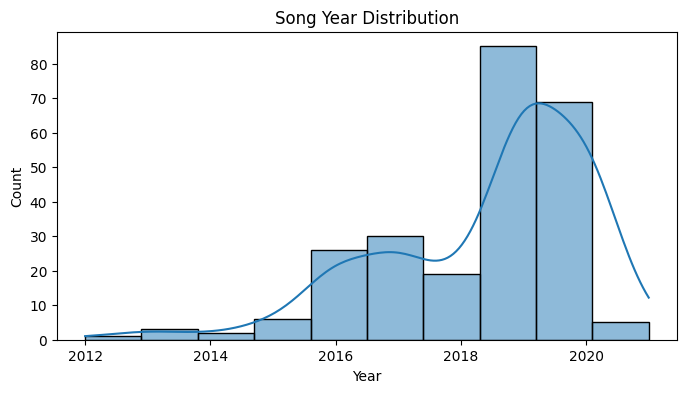

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Year'], bins=10, kde=True)
plt.title("Song Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

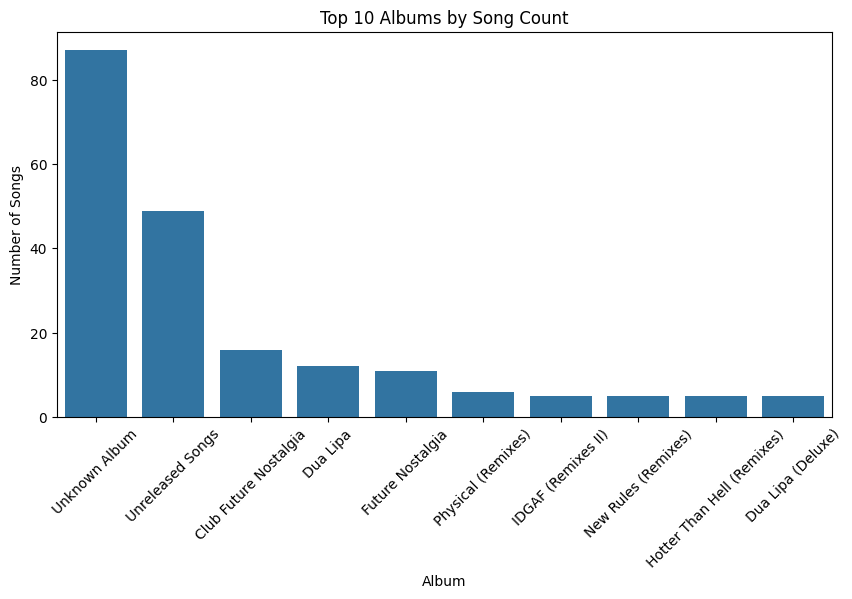

In [ ]:
plt.figure(figsize=(10,5))
top_albums = df['Album'].value_counts().nlargest(10)
sns.barplot(x=top_albums.index, y=top_albums.values)
plt.xticks(rotation=45)
plt.title("Top 10 Albums by Song Count")
plt.ylabel("Number of Songs")
plt.xlabel("Album")
plt.show()

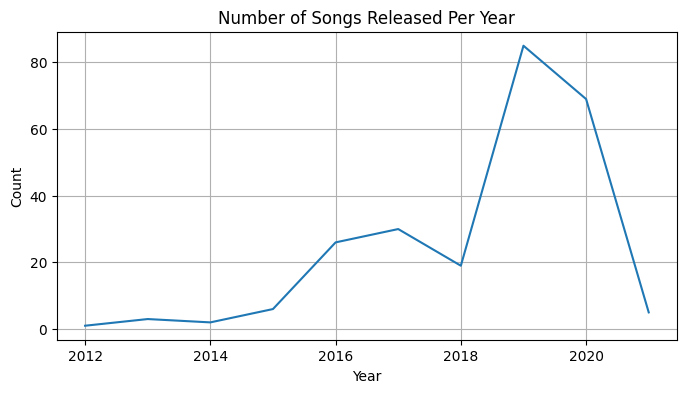

In [ ]:
year_counts = df.groupby('Year').size()
plt.figure(figsize=(8,4))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Songs Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
all_lyrics = " ".join(df['CleanLyric'].tolist())
all_lyrics

'one one one one one   talkin in my sleep at night makin myself crazy out of my mind out of my mind wrote it down and read it out hopin it would save me too many times too many times  refrain my love he makes me feel like nobody else nobody else but my love he doesnt love me so i tell myself i tell myself  pre one dont pick up the phone you know hes only callin cause hes drunk and alone two dont let him in youll have to kick him out again three dont be his friend you know youre gonna wake up in his bed in the morning and if youre under him you aint gettin over him   i got new rules i count em i got new rules i count em i gotta tell them to myself i got new rules i count em i gotta tell them to myself   i keep pushin forwards but he keeps pullin me backwards nowhere to turn no way nowhere to turn no now im standin back from it i finally see the pattern i never learn i never learn  refrain but my love he doesnt love me so i tell myself i tell myself i do i do i do  pre one dont pick up t

In [ ]:
words = all_lyrics.split()
word_counts = Counter(words)
most_common = word_counts.most_common()
most_common

[('i', 3870),
 ('you', 3415),
 ('me', 1950),
 ('the', 1604),
 ('dont', 1304),
 ('my', 1263),
 ('to', 1210),
 ('and', 1095),
 ('it', 984),
 ('a', 916),
 ('im', 883),
 ('on', 855),
 ('in', 813),
 ('your', 773),
 ('be', 717),
 ('all', 706),
 ('know', 629),
 ('we', 610),
 ('up', 607),
 ('got', 596),
 ('so', 568),
 ('love', 566),
 ('that', 553),
 ('but', 552),
 ('like', 545),
 ('if', 520),
 ('cause', 500),
 ('youre', 493),
 ('no', 488),
 ('its', 481),
 ('one', 454),
 ('come', 449),
 ('get', 442),
 ('for', 438),
 ('of', 430),
 ('baby', 425),
 ('can', 419),
 ('yeah', 417),
 ('now', 416),
 ('when', 404),
 ('this', 404),
 ('out', 395),
 ('let', 364),
 ('with', 353),
 ('not', 350),
 ('is', 349),
 ('pre', 343),
 ('oh', 340),
 ('tell', 334),
 ('cant', 328),
 ('wanna', 322),
 ('need', 315),
 ('want', 307),
 ('new', 289),
 ('do', 289),
 ('myself', 279),
 ('what', 278),
 ('just', 272),
 ('him', 265),
 ('ive', 264),
 ('about', 261),
 ('aint', 258),
 ('could', 250),
 ('ooh', 249),
 ('go', 246),
 ('see'

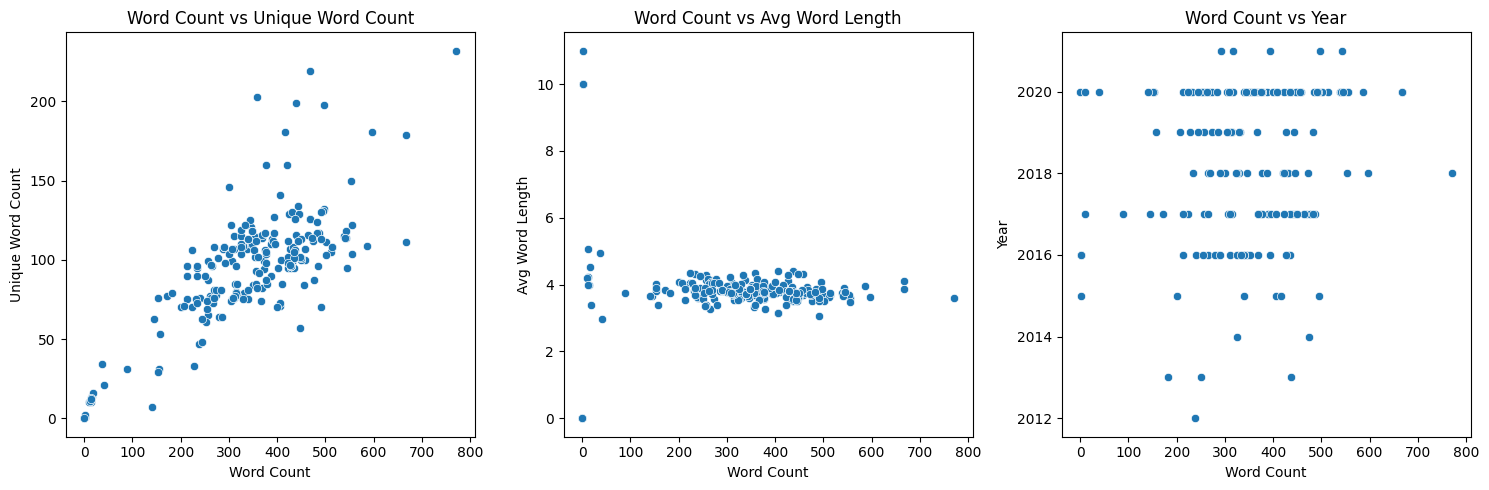

In [ ]:
def compute_text_features(lyric):
    if not isinstance(lyric, str) or "lyrics for this song have yet to be released" in lyric.lower():
        return pd.Series([0, 0, 0])
    words = lyric.split()

    word_count = len(words)
    unique_word_count = len(set(words))

    if word_count > 0:
        avg_word_length = np.mean([len(word) for word in words])
    else:
        avg_word_length = 0

    return pd.Series([word_count, unique_word_count, avg_word_length])

df[['word_count', 'unique_word_count', 'avg_word_length']] = df['Lyric'].apply(compute_text_features)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='word_count', y='unique_word_count')
plt.title('Word Count vs Unique Word Count')
plt.xlabel('Word Count')
plt.ylabel('Unique Word Count')
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='word_count', y='avg_word_length')
plt.title('Word Count vs Avg Word Length')
plt.xlabel('Word Count')
plt.ylabel('Avg Word Length')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='word_count', y='Year')
plt.title('Word Count vs Year')
plt.xlabel('Word Count')
plt.ylabel('Year')

plt.tight_layout()
plt.show()

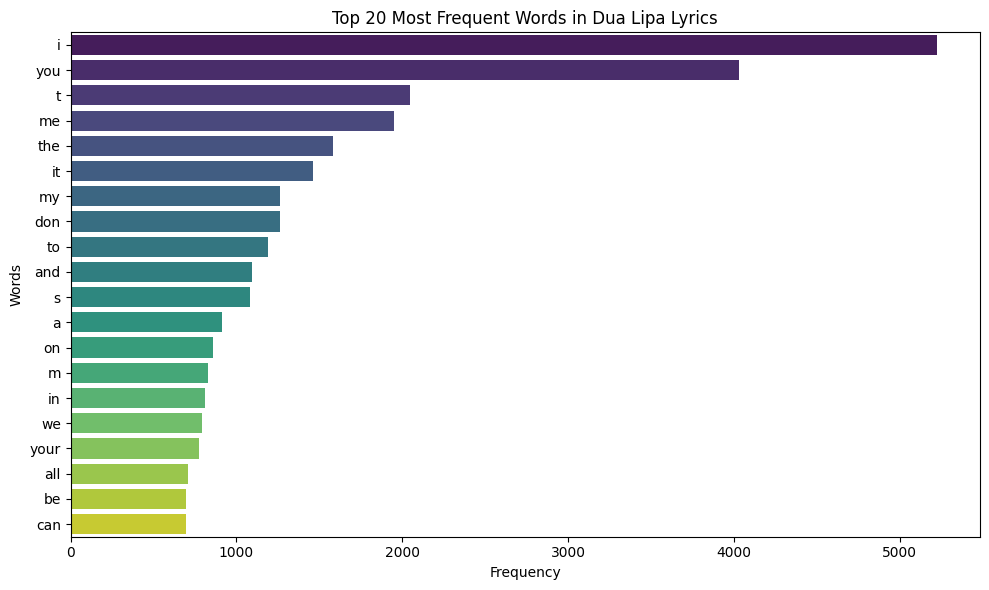

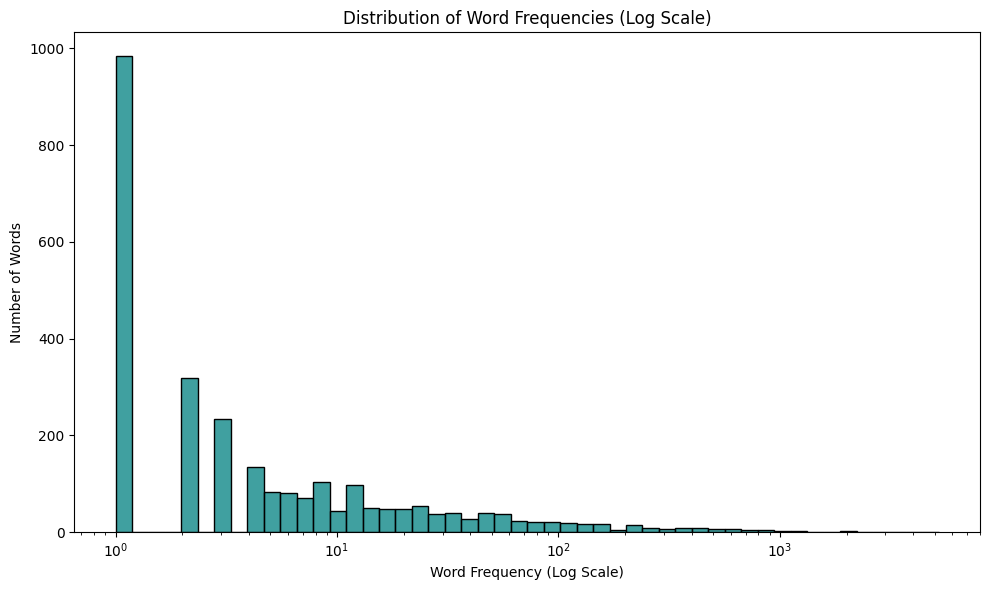

In [ ]:
def tokenize_lyrics(lyric):
    if not isinstance(lyric, str) or "lyrics for this song have yet to be released" in lyric.lower():
        return []

    lyric = lyric.lower()
    words = re.findall(r'\b\w+\b', lyric)
    return words

all_words = []
df['Lyric'].apply(lambda x: all_words.extend(tokenize_lyrics(x)))

word_freq = Counter(all_words)

top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, hue=words, palette='viridis', legend=False)
plt.title('Top 20 Most Frequent Words in Dua Lipa Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

all_counts = [count for word, count in word_freq.items()]
plt.figure(figsize=(10, 6))
sns.histplot(all_counts, bins=50, log_scale=True, color='teal')
plt.title('Distribution of Word Frequencies (Log Scale)')
plt.xlabel('Word Frequency (Log Scale)')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()

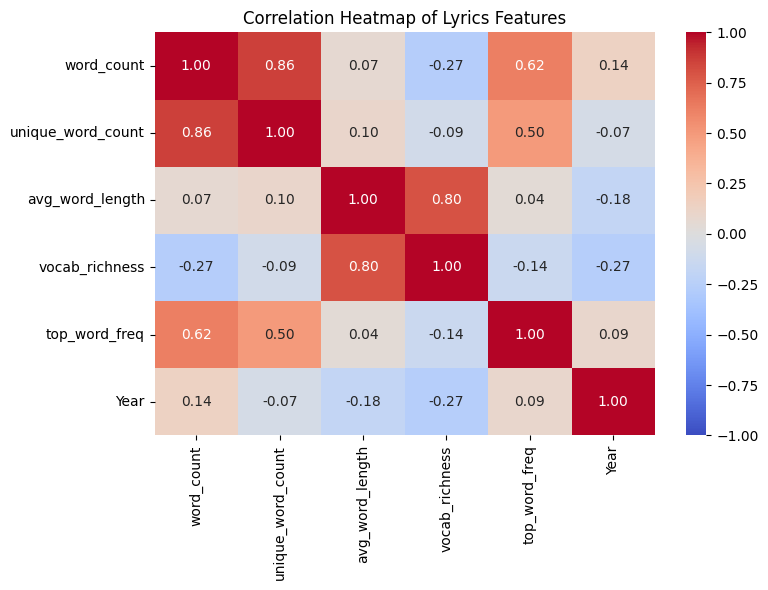

In [ ]:
all_words = []
df['Lyric'].apply(lambda x: all_words.extend(tokenize_lyrics(x)))
word_freq = Counter(all_words)
top_5_words = [word for word, count in word_freq.most_common(5)]
def compute_features(lyric):
    words = tokenize_lyrics(lyric)
    word_count = len(words)

    unique_word_count = len(set(words))
    avg_word_length = np.mean([len(word) for word in words]) if word_count > 0 else 0

    vocab_richness = unique_word_count / word_count if word_count > 0 else 0

    song_word_freq = Counter(words)
    top_word_freq = sum(song_word_freq[word] for word in top_5_words) / word_count if word_count > 0 else 0

    return pd.Series([word_count, unique_word_count, avg_word_length, vocab_richness, top_word_freq])
df[['word_count', 'unique_word_count', 'avg_word_length', 'vocab_richness', 'top_word_freq']] = df['Lyric'].apply(compute_features)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

numerical_cols = ['word_count', 'unique_word_count', 'avg_word_length', 'vocab_richness', 'top_word_freq', 'Year']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Lyrics Features')
plt.tight_layout()
plt.show()

In [ ]:
ranks = range(1, len(most_common)+1)
frequencies = [freq for word, freq in most_common]
zipf_df = pd.DataFrame({
    'Rank': ranks,
    'Word': [word for word, freq in most_common],
    'Frequency': frequencies
})

display(zipf_df.head(10))

,Rank,Word,Frequency
0,1,i,3870
1,2,you,3415
2,3,me,1950
3,4,the,1604
4,5,dont,1304
5,6,my,1263
6,7,to,1210
7,8,and,1095
8,9,it,984
9,10,a,916


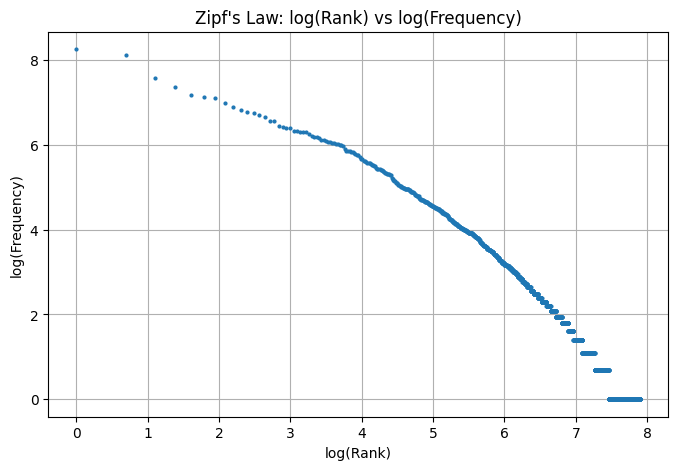

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.log(zipf_df['Rank']), np.log(zipf_df['Frequency']), marker='o', linestyle='None', markersize=2)
plt.title("Zipf's Law: log(Rank) vs log(Frequency)")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.grid(True)
plt.show()

In [ ]:
log_rank = np.log(zipf_df['Rank'])
log_freq = np.log(zipf_df['Frequency'])
slope, intercept, r_value, _, _ = linregress(log_rank, log_freq)
print(f"Estimated Slope ≈ {slope:.2f}")
print(f"R² ≈ {r_value**2:.4f} → Goodness of fit to Zipf’s Law")

Estimated Slope ≈ -1.57
R² ≈ 0.9600 → Goodness of fit to Zipf’s Law


Team Member Contributions

Aditya Singh

Led data collection and cleaning to ensure dataset
accuracy and reliability. Designed initial exploratory
data analysis framework.

Shreyas Sarkar

Conducted Zipf's Law analysis, interpreting linguistic
patterns within Dua Lipa's lyrics with statistical rigor.

Pratik Kumar Pan

Performed bivariate and multivariate analyses,
generating insightful visualizations and correlation
heatmaps. Contributed to the presentation slides.

Priyank Gaur

Coordinated documentation and presentation design,
ensuring a cohesive narrative and visual consistency.
Prepared the final PPT slides.

### ✅ Final Verdict: Zipf’s Law Holds for Dua Lipa's Lyrics

- We analyzed the lyrics of 246 Dua Lipa songs using tokenization and frequency analysis.
- A log-log plot of word rank vs. frequency produced a nearly linear relationship.
- The estimated slope of the line was ≈ -1.57, which is close to the ideal Zipfian slope of -1.
- The R² value was 0.96, indicating a strong fit to a power-law distribution.

📊 Conclusion: The distribution of word frequencies in Dua Lipa's lyrics follows Zipf's Law quite well, showing typical patterns seen in natural language.
